In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('input/digikala-orders.csv')

data.head(-10)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199985,6194722,483447,7108,2017-01-27 21:55:48.000,3623853.0,همدان,1.0
199986,22105540,4343929,738895,2018-08-30 09:42:40.000,192156.0,تهران,2.0
199987,12099975,6835494,404202,2018-03-29 00:02:54.000,119266.0,رشت,1.0
199988,11347656,5882546,556280,2018-02-23 10:44:40.000,4946606.0,هادی شهر,1.0


In [24]:
data['New_Date'] = pd.to_datetime(data['DateTime_CartFinalize'],yearfirst=True)  
data['New_Date3'] = data['New_Date'].map(lambda date:f'{date.year*100 + date.month}')
data['New_Date'] = data['New_Date'].map(lambda date:f'{date.year}/{date.month}')

data.head(5)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,New_Date,New_Date3
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0,2015/10,201510
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,2018/2,201802
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,2016/6,201606
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,2018/9,201809
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,2016/5,201605


In [25]:
monthly_data = data.groupby(['New_Date', 'New_Date3'])['ID_Order'].nunique().reset_index()
monthly_data['New_Date'] = pd.to_datetime(monthly_data['New_Date'])
monthly_datas = monthly_data.sort_values(by=['New_Date'])
monthly_datas['New_Date_2'] = monthly_datas['New_Date'].to_numpy(dtype=str)
monthly_datas['New_Date_2'] = monthly_datas['New_Date_2'].str.slice(0,7)
monthly_datas['New_Date3'] = monthly_datas['New_Date3'].to_numpy(dtype=int)
monthly_datas.head(5)

,New_Date,New_Date3,ID_Order,New_Date_2
3,2013-09-01,201309,6,2013-09
0,2013-10-01,201310,73,2013-10
1,2013-11-01,201311,90,2013-11
2,2013-12-01,201312,116,2013-12
4,2014-01-01,201401,140,2014-01


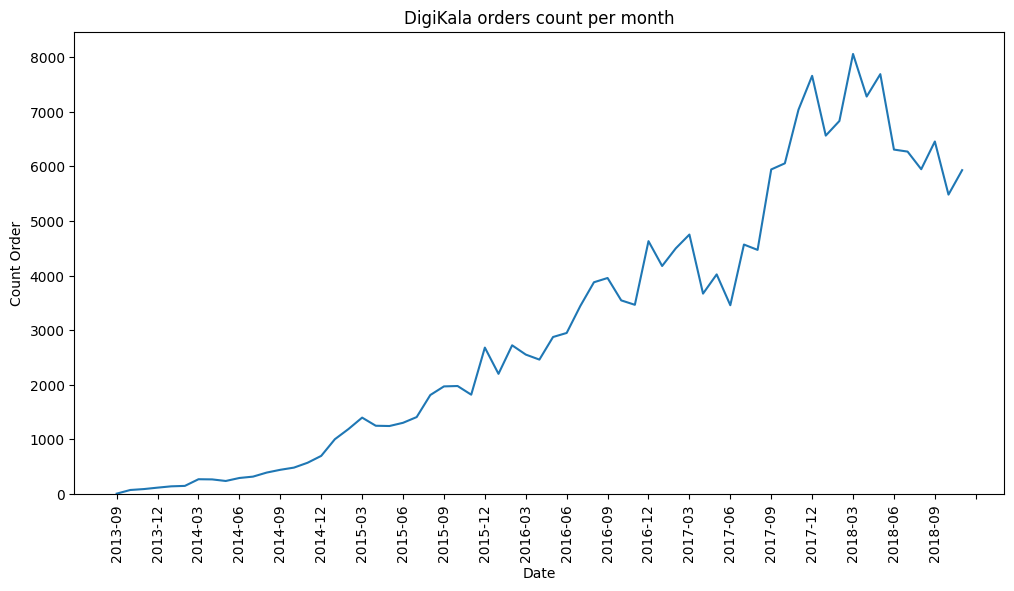

In [26]:
plt.figure(figsize=(12,6))
plt.plot(monthly_datas.query('New_Date3 < 201812')['New_Date_2'].to_numpy(dtype=str), 
         monthly_datas.query('New_Date3 < 201812')['ID_Order'].to_numpy())

plt.title('DigiKala orders count per month')
plt.xlabel('Date')
plt.ylabel('Count Order')
plt.xticks(rotation='vertical')
plt.ylim(bottom = 0) 
plt.xticks(np.arange(0, len(monthly_data), 3))
plt.show()

## Customers count per city (Pie Plot).

In [56]:
city_data = data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
city_data = city_data.sort_values(by="ID_Customer", ascending=False).reset_index()
city_data10= city_data.copy()
city_data10['ID_Customer'] = city_data.query('ID_Customer > 1500')['ID_Customer']
city_data10['city_name_fa'] = city_data.query('ID_Customer > 1500')['city_name_fa']
city_data10 = city_data10.dropna()
city_data10.head(15)

,index,city_name_fa,ID_Customer
0,215,تهران,81048.0
1,815,کرج,4758.0
2,654,مشهد,4674.0
3,76,اصفهان,4664.0
4,97,اهواز,3353.0
5,505,شیراز,3076.0
6,355,رشت,2414.0
7,202,تبریز,2075.0
8,593,قم,1905.0
9,818,کرمانشاه,1718.0


In [57]:
total = 0
for num in city_data.query('ID_Customer <= 1500')['ID_Customer'].to_numpy():
    total += num

city_data10.loc[len(city_data10.index)] = [total, 'سایر شهرها', total] 
city_data10.head(15)

,index,city_name_fa,ID_Customer
0,215,تهران,81048.0
1,815,کرج,4758.0
2,654,مشهد,4674.0
3,76,اصفهان,4664.0
4,97,اهواز,3353.0
5,505,شیراز,3076.0
6,355,رشت,2414.0
7,202,تبریز,2075.0
8,593,قم,1905.0
9,818,کرمانشاه,1718.0


In [58]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

mylabels = city_data10['city_name_fa']

persian_labels = [get_display(reshape(label)) for label in mylabels]

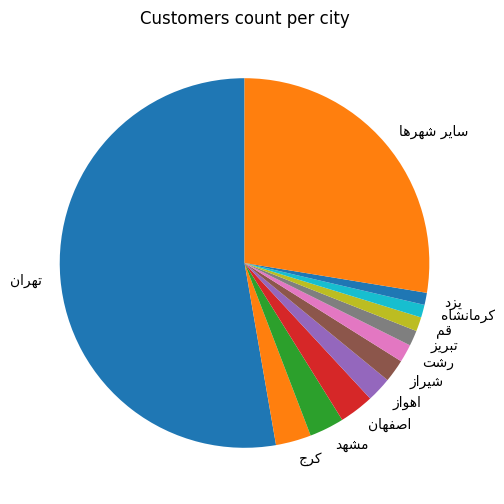

In [60]:
plt.figure(figsize=(12,6))
plt.pie(city_data10['ID_Customer'].to_numpy(), labels = persian_labels, startangle=90)
plt.title('Customers count per city')
plt.show()